<a href="https://colab.research.google.com/github/Cademfitzgerald/Data-Science/blob/main/Cade_Fitzgerald_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

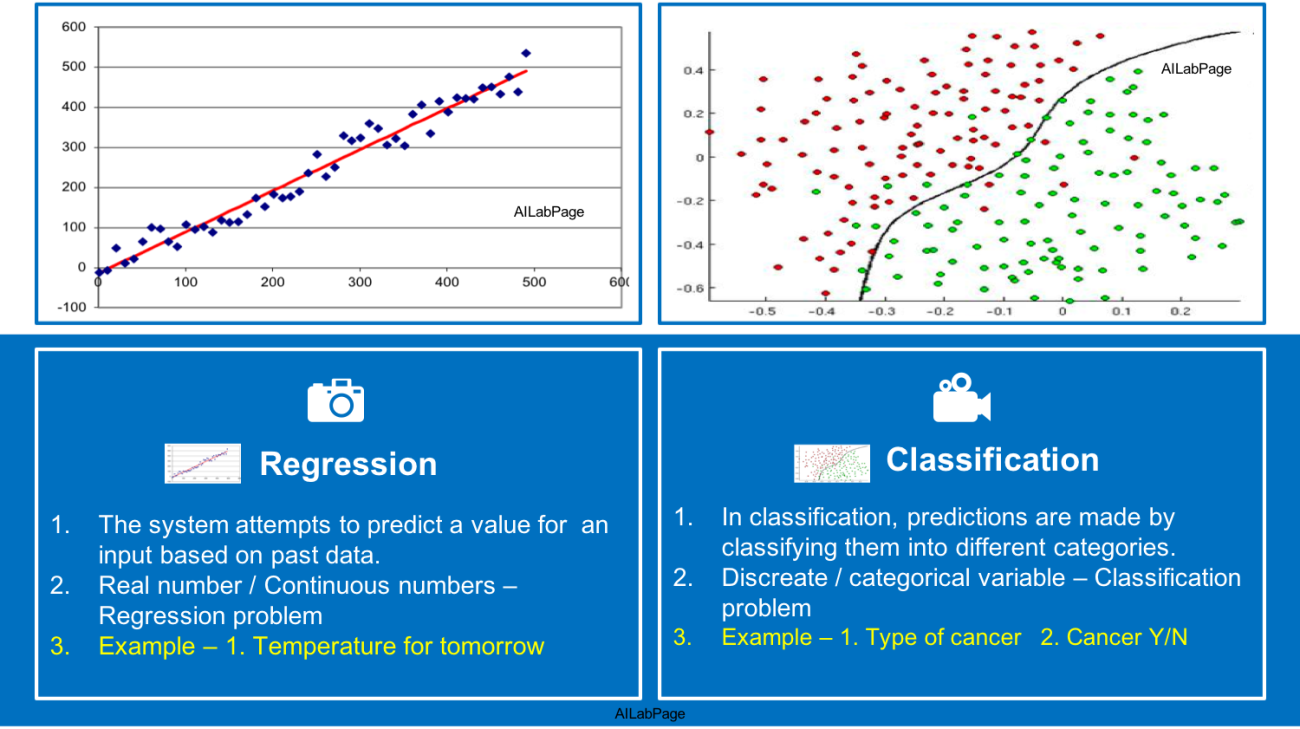

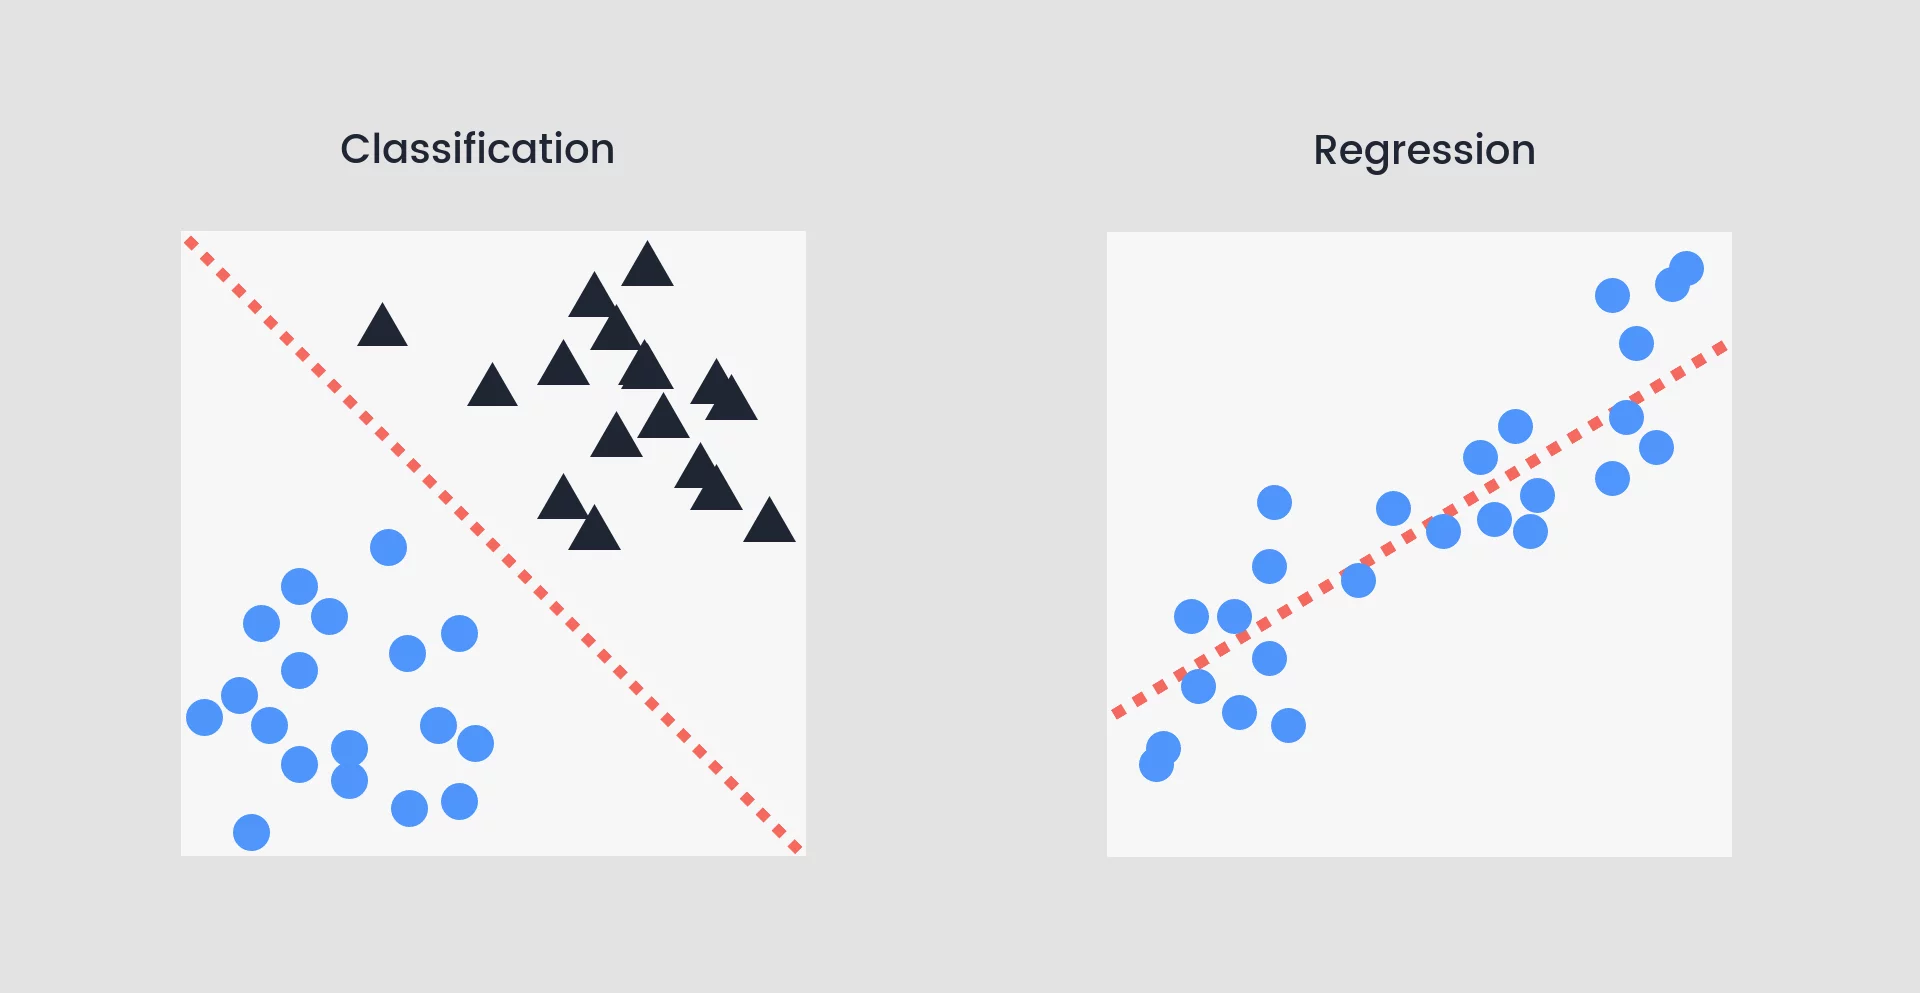

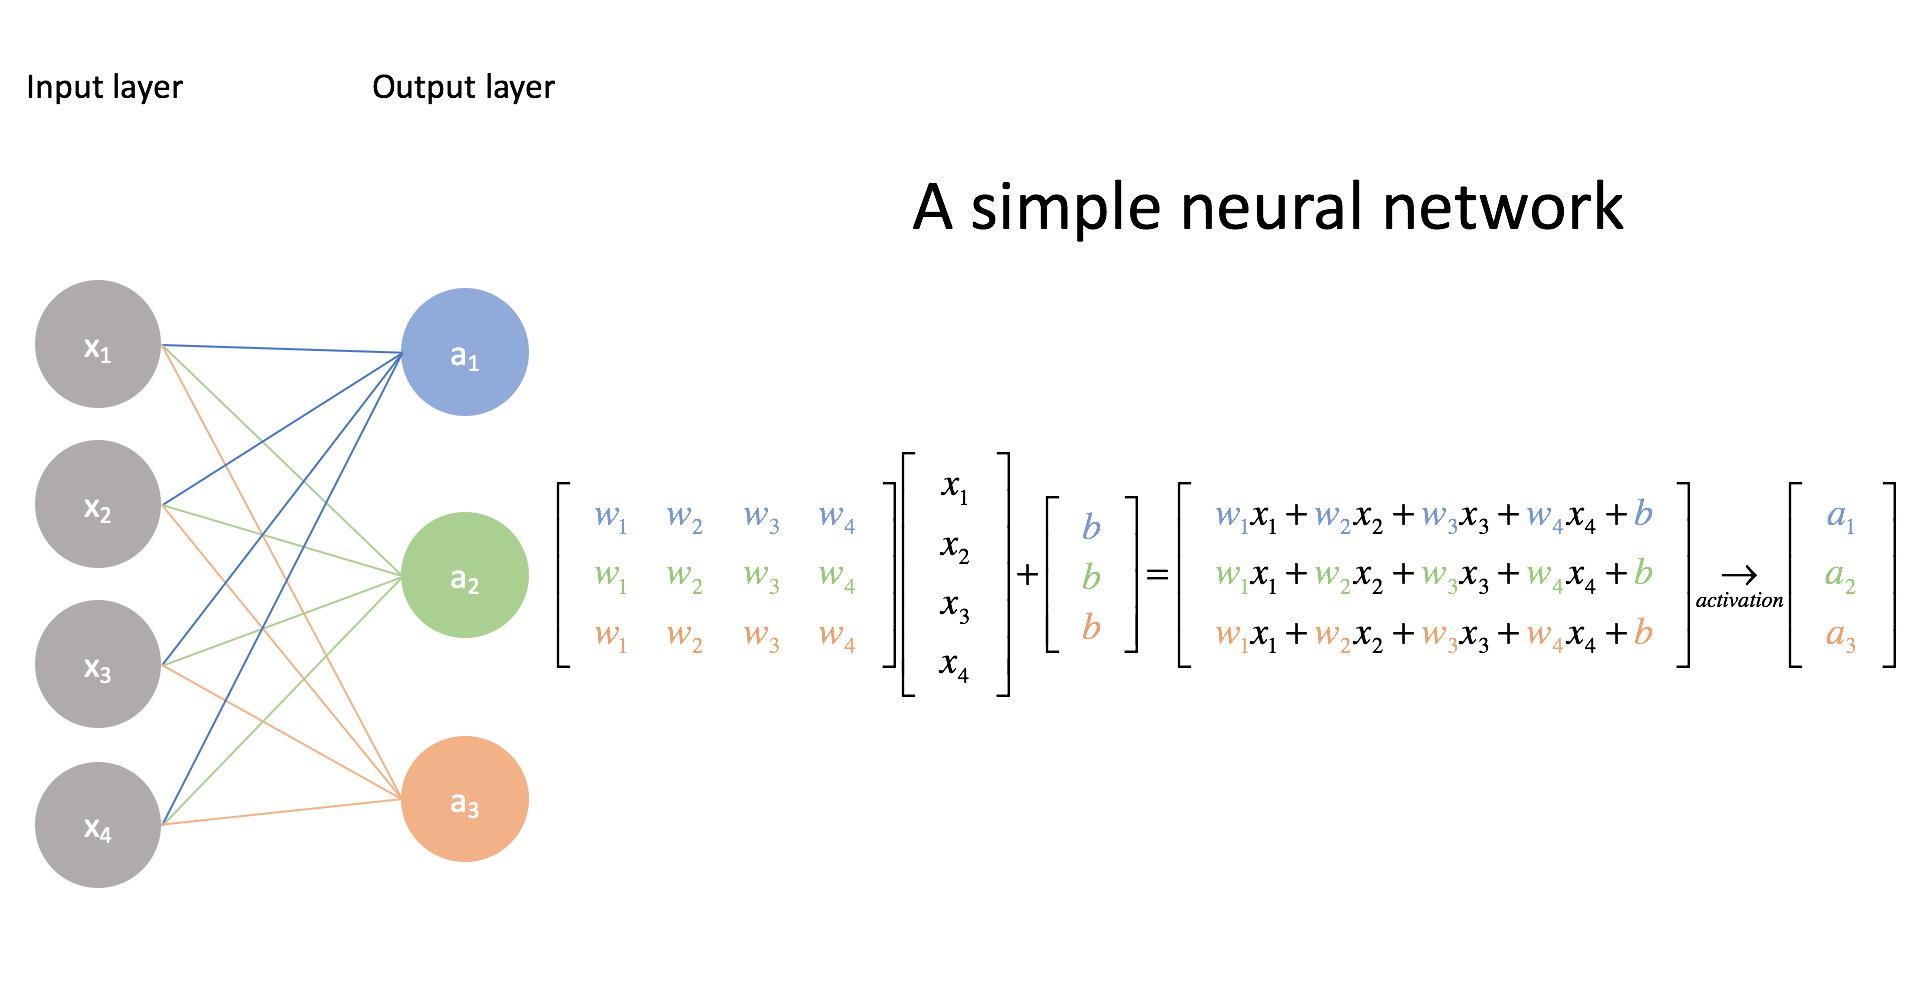

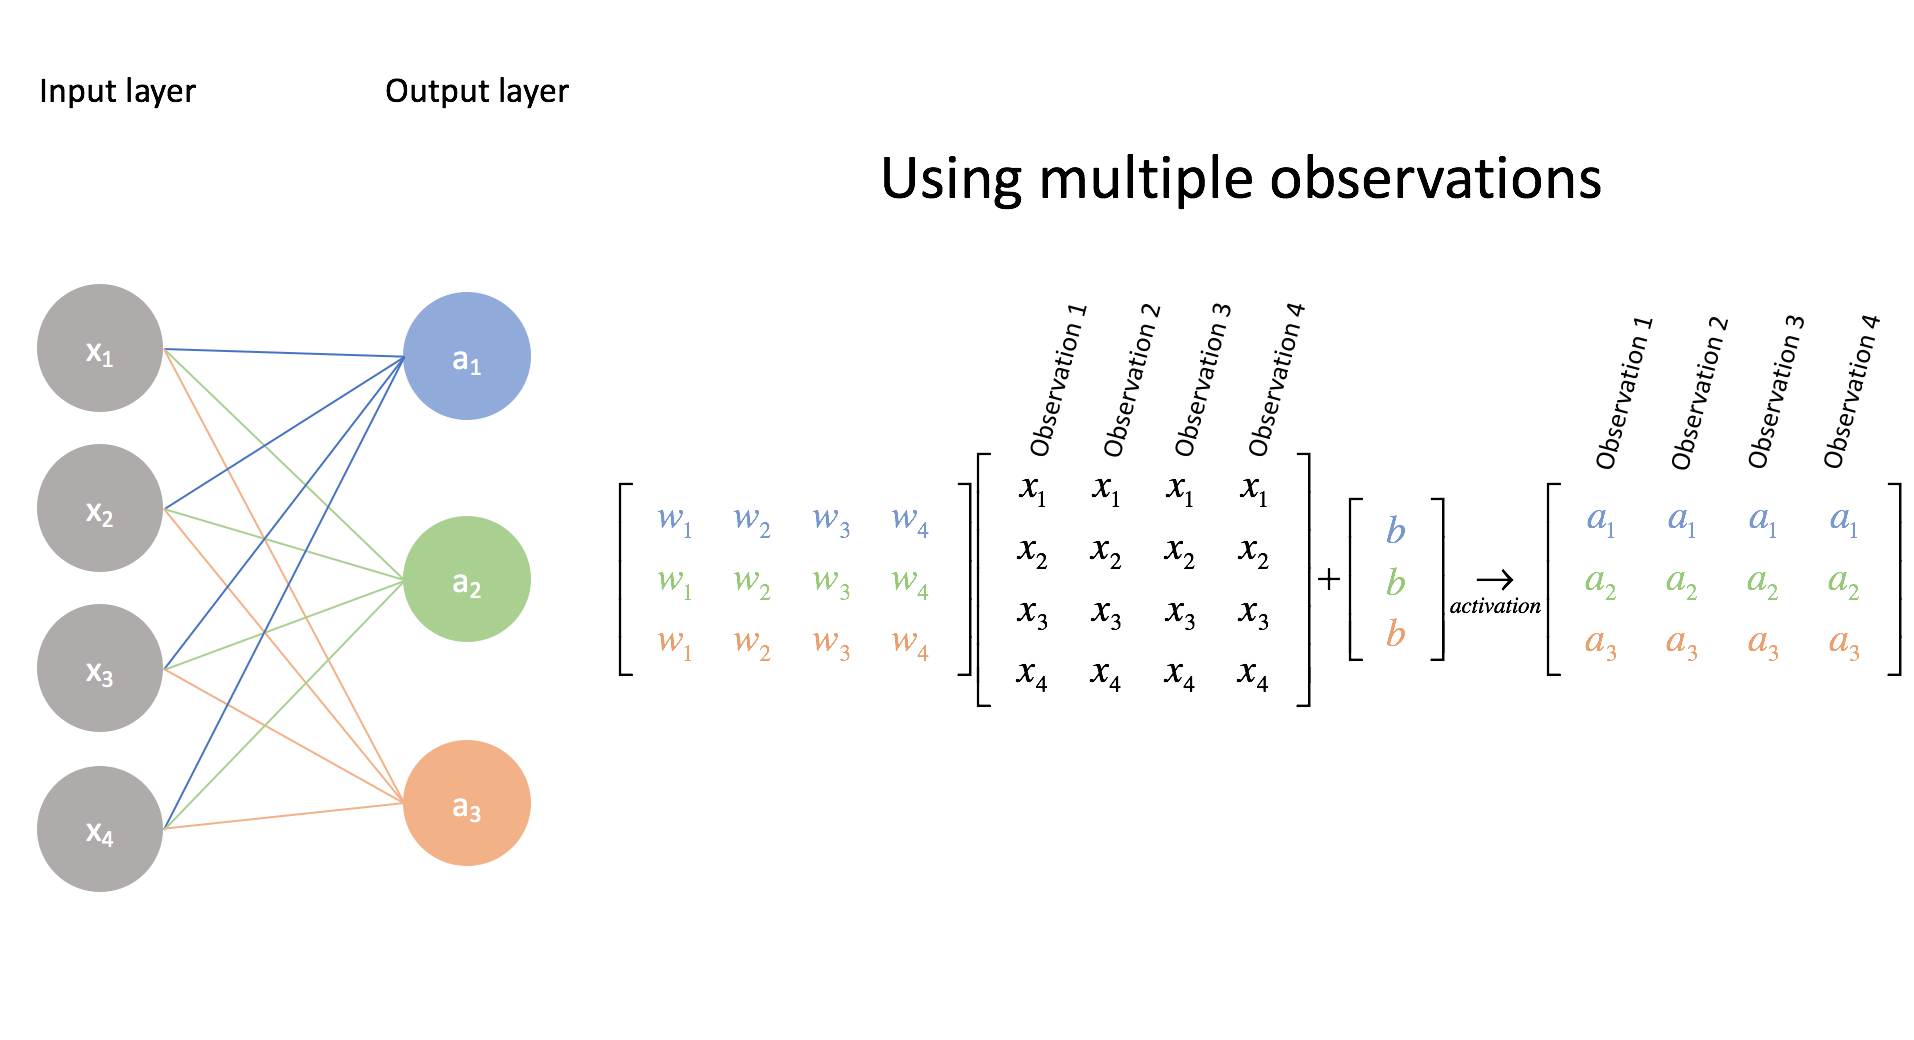

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-rf4hopat
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-rf4hopat
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=670f3f5941db747144dfb10821f3bb653fcc2f987e5730f8a4e0f2bb69ab27bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-r7yiaj8c/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=085c4c8063527bb2482da422753c9e471adf3ed555fe3283c679658f5f3ed60d
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [91]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
#How to get the shape to appear in data

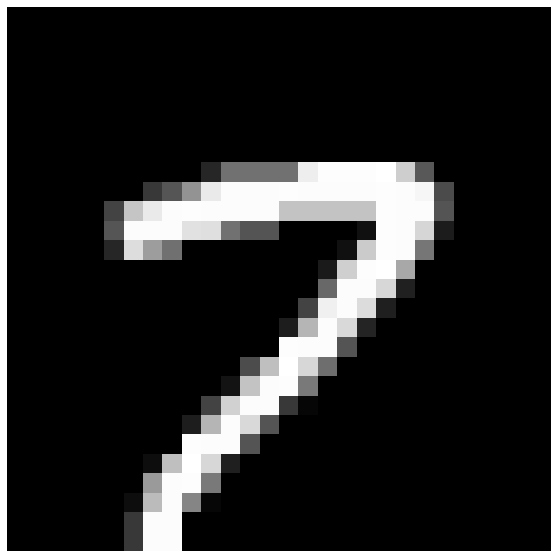

In [ ]:
plot(X[123,0,0:28,0:28])

In [ ]:
#How to make the shape appear as an image

In [ ]:
Y[123]

7

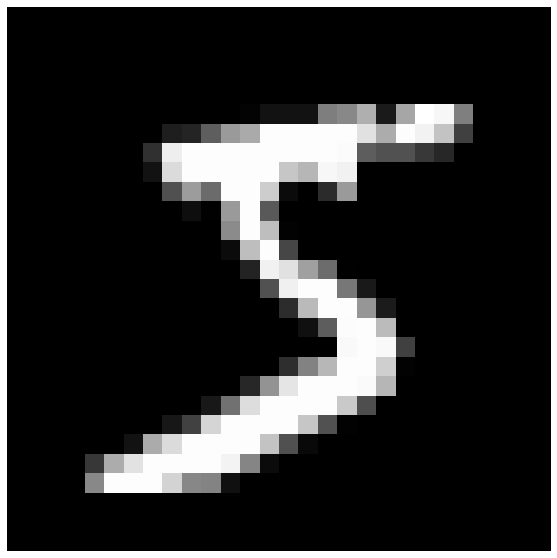

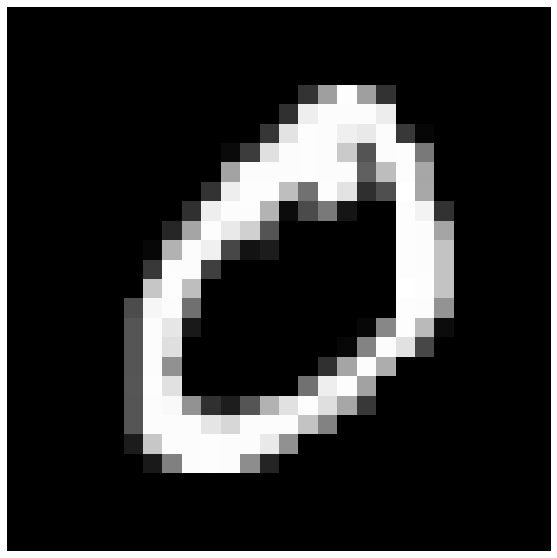

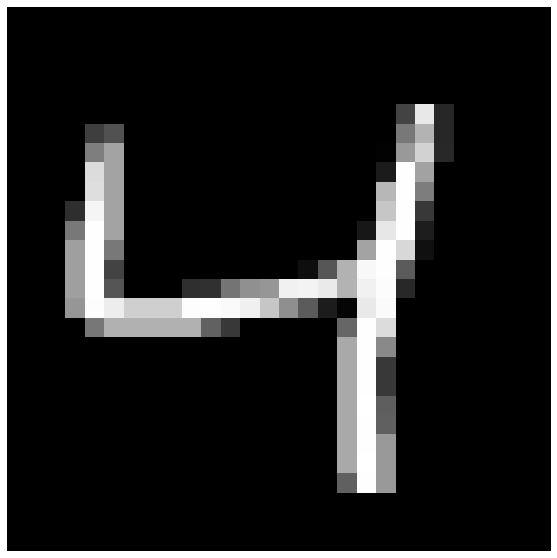

In [ ]:
for i in range(3):
    plot(X[i,0,:,:])

In [ ]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

In [ ]:
#How to get an array of numbers to help shape the image

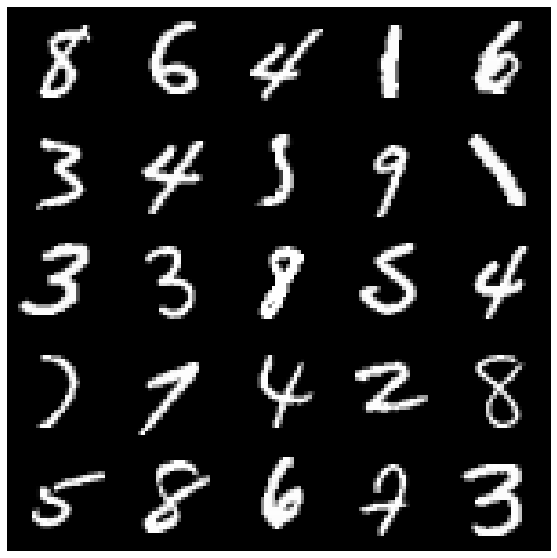

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
#How to get the numbers to appear all in one spot

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28

784

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
#How to get the shape into variables

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#Getting all the different values of X to appear

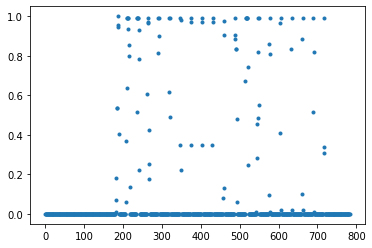

In [ ]:
plt.plot(X[100],'.')

In [ ]:
#plotting the values of X

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

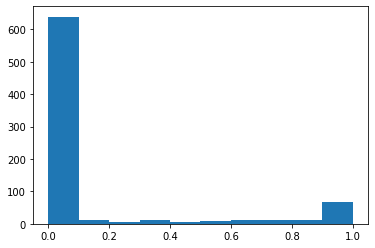

In [ ]:
plt.hist(X[0])

In [ ]:
#Plotting the different varriables in a histogram

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")

'W.data'

In [ ]:
#How to import data off of Github and target the specific data

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

In [ ]:
#How to make an if function so that it plots an image

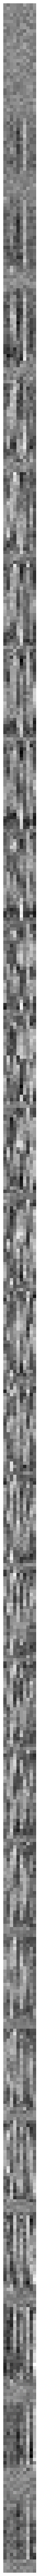

In [ ]:
plot(W[0:784,:10])

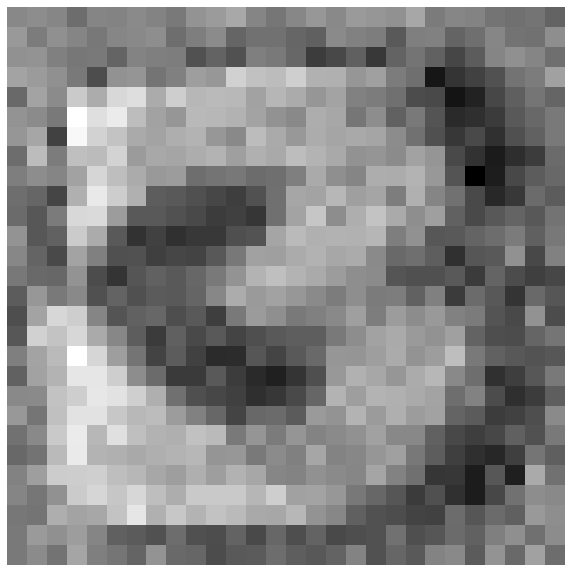

In [ ]:
plot(W[:,3].reshape(28,28))

In [ ]:
#How to make the whole of one image appear

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
#An if else function to test possible outcomes

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([40, 784])

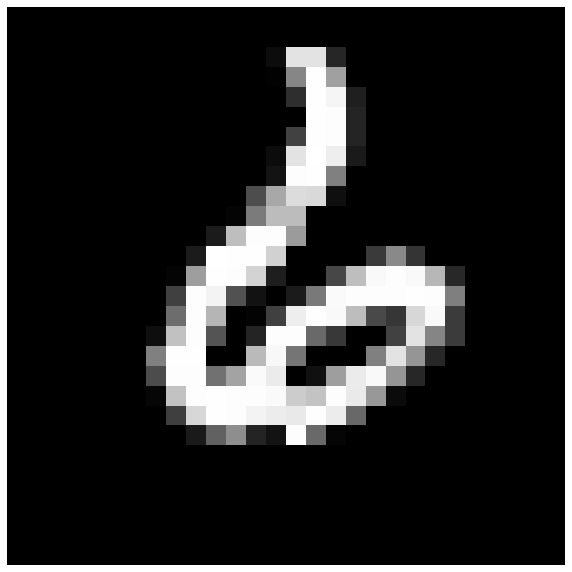

In [ ]:
plot(x[0].reshape(28,28))

In [ ]:
#Making a section of the whole image appear

In [ ]:
y

tensor([6., 1., 6., 3., 4., 5., 6., 3., 0., 5., 5., 9., 5., 9., 3., 3., 3., 2.,
        5., 2., 2., 7., 5., 0., 7., 0., 2., 3., 5., 2., 9., 5., 6., 2., 9., 2.,
        2., 0., 6., 9.], device='cuda:0')

In [ ]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [ ]:
(x@W).shape

torch.Size([40, 10])

In [ ]:
y = x@W

In [ ]:
y.shape

torch.Size([40, 10])

In [ ]:
y

tensor([[ 3.2539e-01, -7.8909e+00,  4.4823e-01, -6.4059e+00, -6.4810e-01,
         -4.3263e+00,  1.2460e+01, -7.3500e+00, -3.7985e+00, -2.3800e+00],
        [-3.2030e+00,  7.8639e+00,  8.9311e-02,  1.3313e+00, -6.1797e+00,
         -2.7442e+00, -6.8425e-01, -4.3121e+00,  4.1914e+00, -1.9091e-02],
        [-1.1182e+00, -1.1400e+01,  1.0583e+00, -1.5803e+01,  4.9193e+00,
         -1.8509e+01,  1.2973e+01, -8.9886e+00,  3.4346e+00,  2.6285e+00],
        [-1.9980e+00, -5.2960e+00,  1.9251e+00,  9.4769e+00, -3.2691e+00,
          3.0774e+00, -2.6894e+00, -1.1620e+01,  3.8450e-02, -8.1911e+00],
        [ 5.3774e+00, -2.2040e+01, -4.2249e+00, -1.9138e+01,  1.3592e+01,
         -5.9172e+00,  7.0686e+00, -6.5506e+00, -3.9552e+00, -2.4825e+00],
        [-7.3308e-01, -6.0502e+00, -3.6519e+00, -3.1073e+00,  3.0601e-01,
          8.2052e-01, -4.0140e+00,  2.9556e+00,  1.1561e+00,  1.2263e+00],
        [-4.8191e+00, -7.7829e+00,  8.2172e-01, -8.1127e+00,  7.4862e+00,
         -2.7024e+00,  9.8245e+0

In [ ]:
torch.argmax(y,1)

tensor([6, 1, 6, 3, 4, 7, 6, 3, 0, 5, 5, 9, 5, 4, 3, 3, 3, 2, 6, 2, 2, 7, 5, 0,
        7, 0, 2, 3, 5, 2, 9, 5, 6, 8, 9, 2, 2, 0, 6, 9], device='cuda:0')

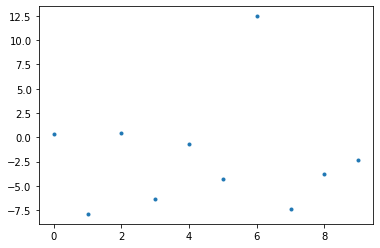

In [ ]:
plt.plot(y[0].cpu().detach().numpy().T,'.')

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[ 3.2539e-01, -7.8909e+00,  4.4823e-01, -6.4059e+00, -6.4810e-01,
         -4.3263e+00,  1.2460e+01, -7.3500e+00, -3.7985e+00, -2.3800e+00],
        [-3.2030e+00,  7.8639e+00,  8.9311e-02,  1.3313e+00, -6.1797e+00,
         -2.7442e+00, -6.8425e-01, -4.3121e+00,  4.1914e+00, -1.9091e-02],
        [-1.1182e+00, -1.1400e+01,  1.0583e+00, -1.5803e+01,  4.9193e+00,
         -1.8509e+01,  1.2973e+01, -8.9886e+00,  3.4346e+00,  2.6285e+00],
        [-1.9980e+00, -5.2960e+00,  1.9251e+00,  9.4769e+00, -3.2691e+00,
          3.0774e+00, -2.6894e+00, -1.1620e+01,  3.8450e-02, -8.1911e+00],
        [ 5.3774e+00, -2.2040e+01, -4.2249e+00, -1.9138e+01,  1.3592e+01,
         -5.9172e+00,  7.0686e+00, -6.5506e+00, -3.9552e+00, -2.4825e+00],
        [-7.3308e-01, -6.0502e+00, -3.6519e+00, -3.1073e+00,  3.0601e-01,
          8.2052e-01, -4.0140e+00,  2.9556e+00,  1.1561e+00,  1.2263e+00],
        [-4.8191e+00, -7.7829e+00,  8.2172e-01, -8.1127e+00,  7.4862e+00,
         -2.7024e+00,  9.8245e+0

In [ ]:
y2 = x@W 

In [ ]:
y2.shape

torch.Size([40, 10])

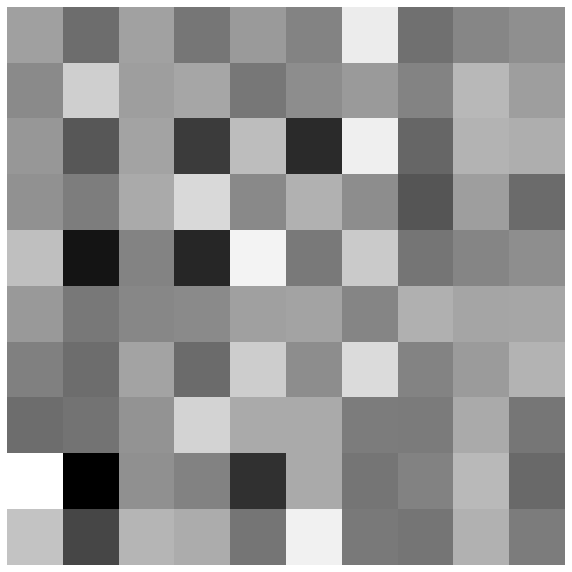

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([[ 3.2539e-01, -7.8909e+00,  4.4823e-01, -6.4059e+00, -6.4810e-01,
         -4.3263e+00,  1.2460e+01, -7.3500e+00, -3.7985e+00, -2.3800e+00],
        [-3.2030e+00,  7.8639e+00,  8.9311e-02,  1.3313e+00, -6.1797e+00,
         -2.7442e+00, -6.8425e-01, -4.3121e+00,  4.1914e+00, -1.9091e-02],
        [-1.1182e+00, -1.1400e+01,  1.0583e+00, -1.5803e+01,  4.9193e+00,
         -1.8509e+01,  1.2973e+01, -8.9886e+00,  3.4346e+00,  2.6285e+00],
        [-1.9980e+00, -5.2960e+00,  1.9251e+00,  9.4769e+00, -3.2691e+00,
          3.0774e+00, -2.6894e+00, -1.1620e+01,  3.8450e-02, -8.1911e+00],
        [ 5.3774e+00, -2.2040e+01, -4.2249e+00, -1.9138e+01,  1.3592e+01,
         -5.9172e+00,  7.0686e+00, -6.5506e+00, -3.9552e+00, -2.4825e+00],
        [-7.3308e-01, -6.0502e+00, -3.6519e+00, -3.1073e+00,  3.0601e-01,
          8.2052e-01, -4.0140e+00,  2.9556e+00,  1.1561e+00,  1.2263e+00],
        [-4.8191e+00, -7.7829e+00,  8.2172e-01, -8.1127e+00,  7.4862e+00,
         -2.7024e+00,  9.8245e+0

In [93]:
one_hot(y)

ValueError: ignored

In [ ]:
plot(one_hot(y))

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

In [ ]:
torch.argmax(y2,1)

In [ ]:
b

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

In [ ]:
X.shape

In [ ]:
%%timeit
X[20000]@W

In [ ]:
torch.argmax(X@W,1)

In [ ]:
Y

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

In [ ]:
X@W

In [ ]:
W.shape

In [ ]:
W[:,0].shape

In [ ]:
plot(W[:,0].reshape(28,28))

In [ ]:
plot(W[:,9].reshape(28,28))

In [94]:
#How to plot the data to see the range of the data

In [ ]:
W.shape

In [ ]:
(W.T).shape

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [95]:
#Putting all the different images together into one large montage image

In [97]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [98]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [99]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [100]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [101]:
X.shape

torch.Size([60000, 784])

In [102]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [96]:
#An if else function to test the different options

In [103]:
def model(x,w):

    return x@w[0]

In [104]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [106]:
#Using weights and biases to to help dislpey the output of the data

#Generator

In [107]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [108]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [109]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [110]:
batch_size = 512

In [ ]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [111]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [112]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [113]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6265, 1, 28, 28), (60000,), (1028, 1, 28, 28), (10000,))

In [114]:
#

In [115]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [116]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [117]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [118]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [119]:
x,y = get_batch('train')

(array([339512.,   4349.,   3550.,   3288.,   3293.,   3837.,   3433.,
          3732.,   4457.,  31957.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

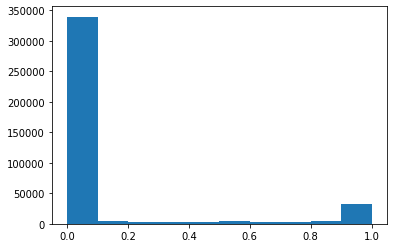

In [120]:
plt.hist(x.flatten().cpu().numpy())

In [157]:
#How to plot a histogram to display the data

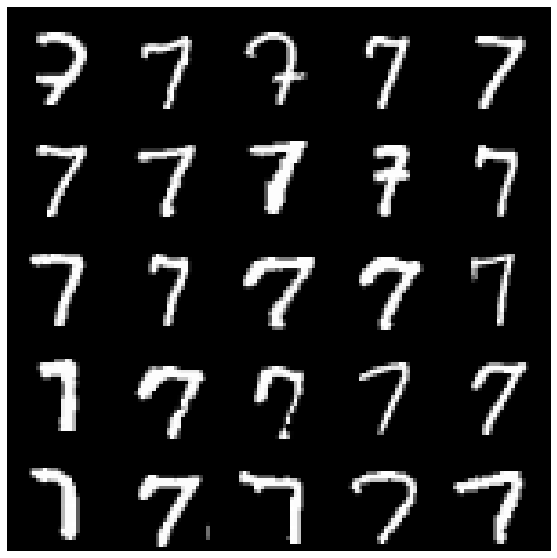

In [121]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [158]:
#How to get a montage of imgaes into one large image

In [122]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [160]:
#An if else function to help test random number outputs

In [123]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [124]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [125]:
def Encoder(x,w):
    return x@w[0]

In [126]:
def Decoder(x,w):
    return x@(w[0].T)

In [127]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [159]:
#Defing different functions to be used later

In [128]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [129]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.32295289635658264
0.004625420086085796
0.003983902279287577
0.004176317248493433
0.00435866741463542
0.004194594454020262
0.003996026702225208
0.00400079321116209
0.0041525838896632195
0.004124701954424381


In [130]:
# batch_size = 16

In [131]:
x,y = get_batch('test')

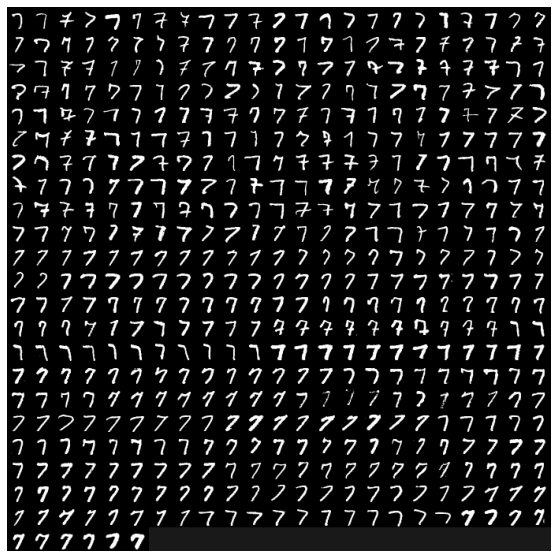

In [133]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())

In [161]:
#How to get an even larger montage of all the different variants 

In [132]:
x.shape

torch.Size([512, 784])

In [134]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [137]:
x2 = Autoencoder(x,w)

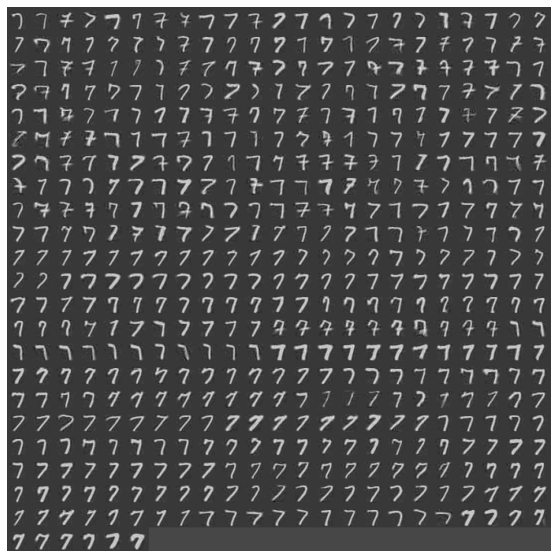

In [136]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

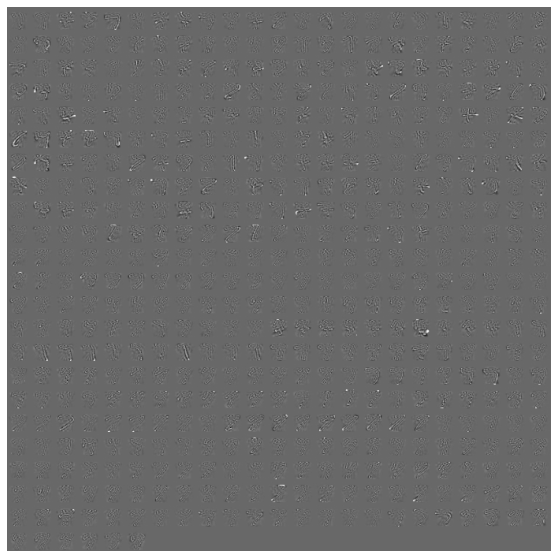

In [138]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())

In [162]:
#How to reshape the montage to make it appear in different ways

In [139]:
w[0].shape

torch.Size([784, 78])

In [140]:
wp = w[0].T 

In [141]:
wp = wp.reshape(-1,28,28)

In [163]:
#How to define the reshaping in a varriable to make it easier

In [142]:
wp.shape

torch.Size([78, 28, 28])

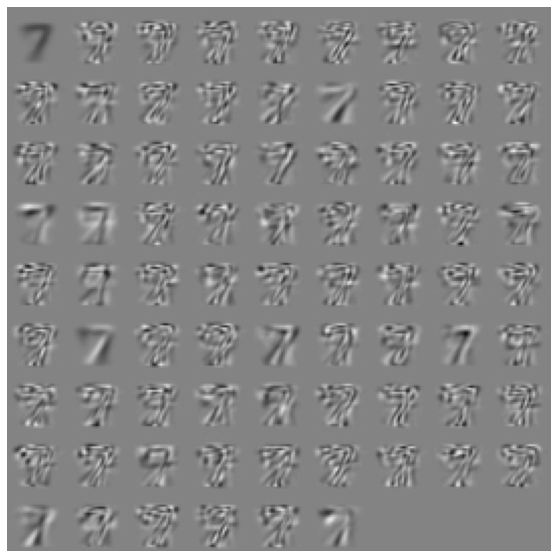

In [143]:
montage_plot(wp.detach().cpu().numpy())

In [164]:
#Changing the way that the montage appears

In [144]:
x.shape

torch.Size([512, 784])

In [145]:
x = x[0:1]

In [146]:
y = Encoder(x,w)

In [147]:
y.shape

torch.Size([1, 78])

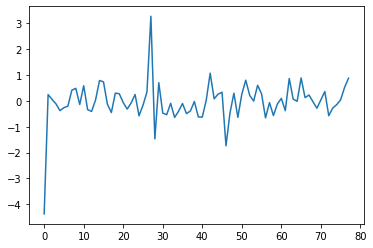

In [148]:
plt.plot(y[0].cpu().detach().numpy())

In [165]:
#Ploting the data on a line graph

In [149]:
noise = 0.5*np.random.randn(78)

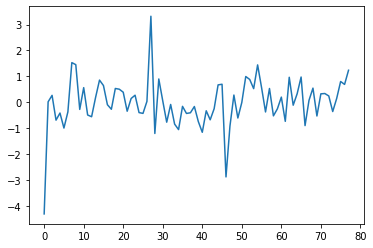

In [150]:
plt.plot(y[0].cpu().detach().numpy() + noise)

In [151]:
noise

array([ 0.07433974, -0.22375571,  0.21491521, -0.56780978, -0.03391247,
       -0.7281523 , -0.1657789 ,  1.11908824,  0.96848267, -0.13262216,
       -0.01760472, -0.14690502, -0.14734977,  0.14879198,  0.06924742,
       -0.08860106,  0.03840575,  0.18554186,  0.23642251,  0.23187095,
        0.45851828, -0.02365035,  0.22947041,  0.02928281,  0.1827678 ,
       -0.2558118 , -0.30272695,  0.04444753,  0.27264351,  0.19831427,
        0.53099008, -0.23006128,  0.01371755, -0.19897445, -0.64853917,
       -0.0510696 ,  0.06687131, -0.01278529, -0.13539963, -0.12005505,
       -0.52477724, -0.35202785, -1.74472643, -0.32540365,  0.41429953,
        0.36425643, -1.13611172, -0.4400399 , -0.01536883,  0.03480846,
       -0.26357342,  0.19560266,  0.67261795,  0.53571354,  0.84080876,
        0.29715578,  0.28858839,  0.60247325,  0.04666288, -0.12900592,
        0.10538212, -0.35275036,  0.101211  , -0.1740196 ,  0.34622498,
        0.08873771, -1.02257906, -0.14654566,  0.58093465, -0.23

In [152]:
noise = GPU(noise)

In [153]:
x2 = Decoder(y+noise,w)

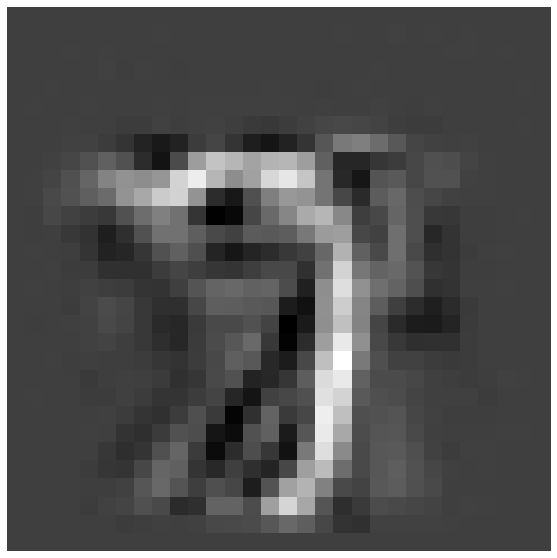

In [154]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())

In [166]:
#How to zoom in on one section of the montage after its been altered

In [155]:
x2 = Decoder(y,w)

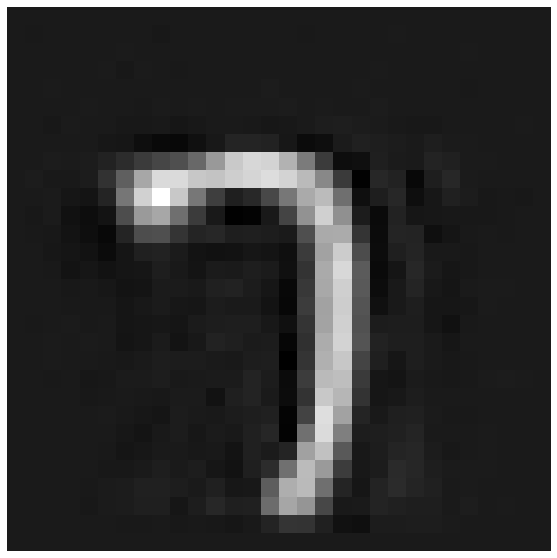

In [156]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())